In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None


colnames = ["X", "Y", "Z"]
data = pd.read_csv("https://raw.githubusercontent.com/faaabi93/DGM/master/dgm1000.utm32s.xyzascii/dgm1000/dgm1000_utm32s.xyz", names = colnames, sep=" ")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
res_x = 2500
res_y = 25000

In [4]:
to_drop = []
for index, row in data.iterrows():
    if row["Y"] % res_y != 0 or row["X"] % res_x != 0:
        to_drop.append(index)

In [5]:
data.drop(to_drop, inplace=True)

print(data)
print(data.describe())

             X        Y        Z
9       460000  6100000    -1.06
14      465000  6100000     4.33
856     455000  6075000     0.06
861     475000  6075000     0.58
866     480000  6075000     0.56
...        ...      ...      ...
369159  585000  5250000  1110.67
369164  590000  5250000  1331.49
369169  595000  5250000   851.05
369174  600000  5250000  1377.05
369179  605000  5250000  1831.95

[2956 rows x 3 columns]
                   X             Y            Z
count    2956.000000  2.956000e+03  2956.000000
mean   592702.976996  5.664538e+06   253.139472
std    147334.412734  2.124605e+05   243.050721
min    290000.000000  5.250000e+06   -14.480000
25%    475000.000000  5.500000e+06    49.635000
50%    590000.000000  5.675000e+06   187.790000
75%    711250.000000  5.825000e+06   418.667500
max    920000.000000  6.100000e+06  2358.140000


In [6]:
data["X"] = data["X"] / res_x
data["Y"] = data["Y"] / res_y
print(data)

            X      Y        Z
9       184.0  244.0    -1.06
14      186.0  244.0     4.33
856     182.0  243.0     0.06
861     190.0  243.0     0.58
866     192.0  243.0     0.56
...       ...    ...      ...
369159  234.0  210.0  1110.67
369164  236.0  210.0  1331.49
369169  238.0  210.0   851.05
369174  240.0  210.0  1377.05
369179  242.0  210.0  1831.95

[2956 rows x 3 columns]


In [7]:
data["Y"] = data["Y"] - min(data["Y"])
data["X"] = data["X"] - min(data["X"])
print(data)

            X     Y        Z
9        68.0  34.0    -1.06
14       70.0  34.0     4.33
856      66.0  33.0     0.06
861      74.0  33.0     0.58
866      76.0  33.0     0.56
...       ...   ...      ...
369159  118.0   0.0  1110.67
369164  120.0   0.0  1331.49
369169  122.0   0.0   851.05
369174  124.0   0.0  1377.05
369179  126.0   0.0  1831.95

[2956 rows x 3 columns]


In [14]:
int_data = data.astype(int)
print(int_data)
int_data["X"] = int_data["X"] / 2

          X   Y     Z
9        68  34    -1
14       70  34     4
856      66  33     0
861      74  33     0
866      76  33     0
...     ...  ..   ...
369159  118   0  1110
369164  120   0  1331
369169  122   0   851
369174  124   0  1377
369179  126   0  1831

[2956 rows x 3 columns]


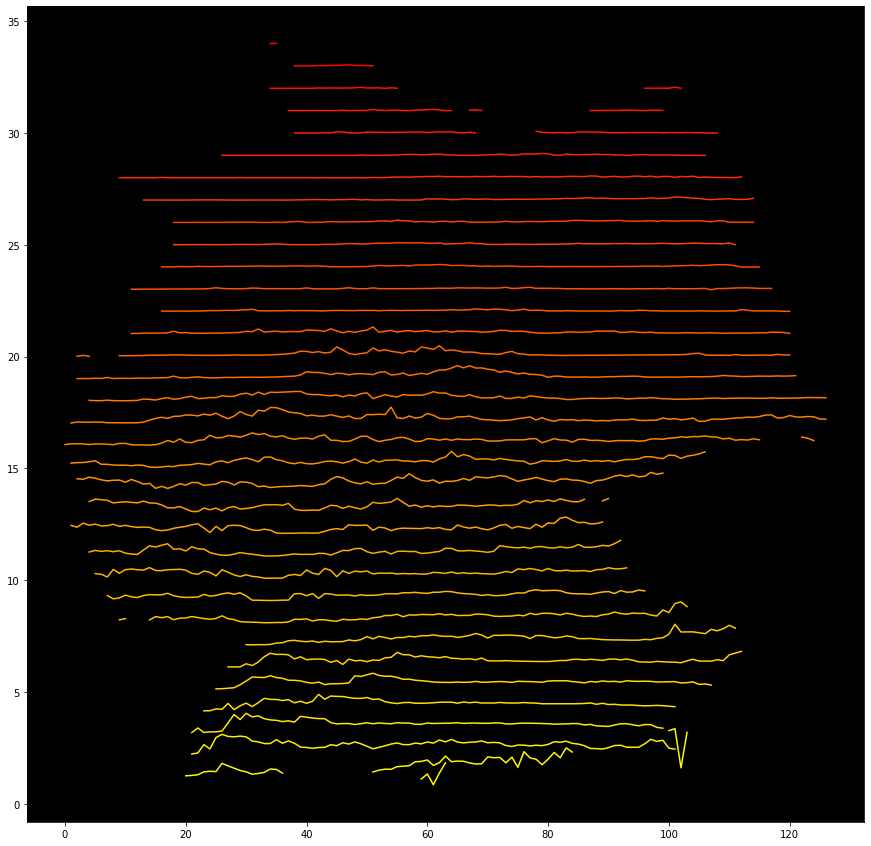

In [26]:
from operator import itemgetter
from itertools import *
from scipy.signal import savgol_filter


y_vals = int_data["Y"].unique().tolist()
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(111)
ax1.set_facecolor('black')


for y in y_vals:
    temp_df = int_data.loc[int_data["Y"] == y]
    temp_df["new_Y"] = temp_df["Y"]
    y = np.array(temp_df["new_Y"].values.tolist())
    x = temp_df["X"].values.tolist()
    z = np.array(temp_df["Z"].values.tolist())
    groups = []
    for k, g in groupby(enumerate(x), lambda x: x[0]-x[1]):
      groups.append(list(map(itemgetter(1), g)))
    """print(groups)
    print(x)
    print(y)
    print(z)"""
    my = ma.array(y)
    len_count = 0
    for l in groups[:-1]:
      len_count += len(l)
      my[len_count] = ma.masked
    correct_y = my + 0.001 * z
    ax1.plot(x, correct_y)



colormap = plt.cm.autumn #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])


In [ ]:
kar